En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal y a un Decision Tree. El objetivo de hoy es:
-Ajustar el modelo a un Random Forest
-Extraer las métricas
-Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('once')

In [2]:
df = pd.read_pickle("datos/peliculas_limpio.pkl")
df.head(2)

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX,Ryr_Sklstd,Rnt_Sklstd,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd,Genre_map,Cert_map
0,1994.0,A,142,Drama,9.3,80.0,2343110.0,28341469.0,0.100485,-0.151515,0.676471,-0.001712,6.918768,0.131429,2,4.0
1,1972.0,A,175,Crime,9.2,100.0,1620367.0,134966411.0,0.100485,-0.818182,1.647059,1.426860,4.650520,1.997227,2,4.0


In [3]:
# Separamos x e y
X = df.drop(["Released_Year", 'Genre','Certificate', 'Runtime','Meta_score','No_of_Votes','IMDB_Rating','Gross','Rating_BOX'], axis = 1)
y = df["Rating_BOX"]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
param = {"max_depth": [2,4, 6],
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]}

In [7]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), 
            param_grid= param, 
            cv=10, 
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [8]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [9]:
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=6, max_features=4, min_samples_leaf=50,
                      min_samples_split=100)

Una vez hecho el GridSearchCV vemos que los resultados son max_depth=6, max_features=1, min_samples_leaf=10, min_samples_split=50 y decidimos sacar las métricas para ver la importancia predictora e ir ajustándonos a la más exacta.

In [10]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

Estamos comprobando la eficiencia de nuestro modelo de predicción con las métricas.Como vemos abajo son una métricas donde R2 no llega al 0.7 con lo que vamos a hacer es ajustar los hiperparámetros.

In [12]:
dt_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
dt_results

,MAE,MSE,RMSE,R2,set,modelo
0,2.782324e-11,1.064609e-21,3.262835e-11,0.088043,test,Random Forest
1,2.832022e-11,1.128213e-21,3.358889e-11,0.093676,train,Random Forest


In [13]:
param = {"max_depth": [5,6,7],
        "max_features": [1,5,10],
        "min_samples_split": [35,50,70],
        "min_samples_leaf": [5,10,20]}

In [14]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), 
            param_grid= param, 
            cv=10, 
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [15]:
x_train.isnull().sum()

Ryr_Sklstd      0
Rnt_Sklstd      0
Meta_Sklstd     0
Votes_Sklstd    0
Gross_Sklstd    0
Genre_map       0
Cert_map        0
dtype: int64

In [16]:
gs_rf.fit(x_train, y_train)

/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adalaber/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/adalaber/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/adalaber/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/adalaber/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _disp

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7], 'max_features': [1, 5, 10],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [35, 50, 70]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [17]:
bosque = gs_rf.best_estimator_

In [18]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [19]:
dt_results1 = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest2")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,2.796482e-11,1.080999e-21,3.287855e-11,0.074003,test,Random Forest2
1,2.830933e-11,1.131145e-21,3.363250e-11,0.091321,train,Random Forest2


Hemos conseguido ajustar el modelo de predicción ajustando los hiperparámetros y el siguiente paso será invertir el proceso del boxcox para obtener unos datos comprensibles para nuestro cliente.

In [20]:
lambda_ajustada = -9.95

In [21]:
from scipy.special import boxcox, inv_boxcox

In [22]:
dt_results1['RMSE_INVERTIDA']=dt_results1['RMSE'].apply(lambda x: inv_boxcox(x, lambda_ajustada))

In [23]:
dt_results1

,MAE,MSE,RMSE,R2,set,modelo,RMSE_INVERTIDA
0,2.796482e-11,1.080999e-21,3.287855e-11,0.074003,test,Random Forest2,1.0
1,2.830933e-11,1.131145e-21,3.363250e-11,0.091321,train,Random Forest2,1.0


Le podemos explicar al cliente que hará las predicciones con un margen de error de un punto ya que estamos trabajando con intervalos de 0 a 10. Al obtener 1 significa que lo va a modificar mínimamente (valor 1)

Una vez hemos destransformado con el INV_boxcox los valores y ya se pueden entender de forma humano hemos acabado con el proceso. Pero nosotras vamos a seguir más allá y vamos a analizar en un dataframe la importancia de las variables predictoras para descubrir cuáles son realmente influyentes en nuestro modelo.

In [24]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,Gross_Sklstd,0.260027
3,Votes_Sklstd,0.212781
1,Rnt_Sklstd,0.194194
2,Meta_Sklstd,0.175982
0,Ryr_Sklstd,0.146138
6,Cert_map,0.012012
5,Genre_map,-0.001134


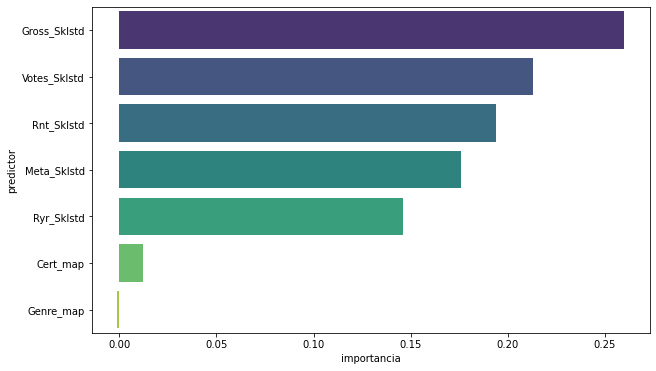

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()